In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('hfi_cc_2019.csv')
df1.tail()

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,...,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
1615,2008,AUS,Australia,Oceania,8.73,4,1,8.8,7.2,7.2,...,3.7,4.6,9.9,8.6,7.3,8.8,7.1,8.5,8.18,6
1616,2008,DNK,Denmark,Western Europe,8.73,4,1,9.4,7.9,8.7,...,4.7,7.4,9.7,9.4,9.7,8.5,8.2,8.6,7.98,9
1617,2008,CHE,Switzerland,Western Europe,8.83,3,1,-,-,-,...,5.5,7.8,9.3,8.8,8.3,9.3,8.1,8.5,8.35,4
1618,2008,NZL,New Zealand,Oceania,8.94,2,1,8.7,7.6,7.9,...,4.5,4.5,10,9.6,9.8,9.2,7.9,8.8,8.46,3
1619,2008,HKG,Hong Kong,East Asia,9.12,1,1,7.9,7.1,7.6,...,6.9,6.9,9.8,8.5,9.8,9.1,8.5,9.3,9.11,1


In [3]:
df1['hf_score'] = df1['hf_score'].str.replace('-','0').astype(float)

In [4]:
df1['ef_score'] = df1['ef_score'].str.replace('-','0').astype(float)

In [5]:
df1['pf_score'] = df1['pf_score'].str.replace('-','0').astype(float)

In [6]:
df1['hf_score'].max()

9.12

In [7]:
df1['hf_score'].min()

0.0

In [8]:
df1_cols = ['year','countries','region','hf_score','pf_score','ef_score']
df1 = df1[df1_cols]
df1 = df1.rename(columns={"countries": "country"})
df1.head()

,year,country,region,hf_score,pf_score,ef_score
0,2017,Albania,Eastern Europe,7.84,8.01,7.67
1,2017,Algeria,Middle East & North Africa,4.99,5.20,4.77
2,2017,Angola,Sub-Saharan Africa,5.40,5.98,4.83
3,2017,Argentina,Latin America & the Caribbean,6.86,8.04,5.67
4,2017,Armenia,Caucasus & Central Asia,7.42,7.15,7.70


In [9]:
df1 = df1[df1['year'] == 2017]
df1.tail()

,year,country,region,hf_score,pf_score,ef_score
157,2017,Venezuela,Latin America & the Caribbean,3.80,5.03,2.58
158,2017,Vietnam,South Asia,6.29,6.31,6.27
159,2017,"Yemen, Rep.",Middle East & North Africa,4.30,2.75,5.84
160,2017,Zambia,Sub-Saharan Africa,6.49,6.13,6.84
161,2017,Zimbabwe,Sub-Saharan Africa,5.65,5.61,5.69


In [10]:
df1['hf_score'].describe()

count    162.000000
mean       6.887963
std        1.104117
min        3.790000
25%        6.212500
50%        6.825000
75%        7.740000
max        8.880000
Name: hf_score, dtype: float64

In [11]:
df1['hf_score'].median()

6.825

In [12]:
df1['pf_score'].describe()

count    162.000000
mean       6.976852
std        1.454050
min        2.530000
25%        5.972500
50%        6.950000
75%        8.040000
max        9.450000
Name: pf_score, dtype: float64

In [13]:
df1['pf_score'].median()

6.949999999999999

In [14]:
df1['ef_score'].describe()

count    162.000000
mean       6.799074
std        0.933742
min        2.580000
25%        6.202500
50%        6.860000
75%        7.505000
max        8.910000
Name: ef_score, dtype: float64

In [15]:
df1['ef_score'].median()

6.86

In [16]:
df_litrate = pd.read_csv('literacy_rate.csv')
df_litrate.tail()

,country,literacy_rate_percent_all,male_literacy_percent_rate,female_literacy_percent_rate,gender_difference_percentWorld,86.3,90.0,82.7,7.3\t
145,Venezuela,95.4,95.0,95.7,-0.7,NaN,NaN,NaN,NaN
146,Vietnam,94.5,96.3,92.8,3.4,NaN,NaN,NaN,NaN
147,Yemen,70.1,85.1,55.0,30.1,NaN,NaN,NaN,NaN
148,Zambia,63.4,70.9,56.0,14.9,NaN,NaN,NaN,NaN
149,Zimbabwe,86.5,88.5,84.6,4.0,NaN,NaN,NaN,NaN


In [17]:
df_litrate.columns = df_litrate.columns.str.replace('_','').str.replace(' ','')
df_litrate.head()

,country,literacyratepercentall,maleliteracypercentrate,femaleliteracypercentrate,genderdifferencepercentWorld,86.3,90.0,82.7,7.3\t
0,Afghanistan,38.2,52.0,24.2,27.8,NaN,NaN,NaN,NaN
1,Albania,97.6,98.4,96.8,1.6,NaN,NaN,NaN,NaN
2,Algeria,80.2,87.2,73.1,14.0,NaN,NaN,NaN,NaN
3,Angola,71.1,82.0,60.7,21.3,NaN,NaN,NaN,NaN
4,Argentina,98.1,98.0,98.1,-0.1,NaN,NaN,NaN,NaN


In [18]:
df_litrate_cols = ['country','literacyratepercentall']
df_litrate = df_litrate[df_litrate_cols]
df_litrate = df_litrate.drop([66])
df_litrate.head()

,country,literacyratepercentall
0,Afghanistan,38.2
1,Albania,97.6
2,Algeria,80.2
3,Angola,71.1
4,Argentina,98.1


In [19]:
df_gdp = pd.read_csv('gdp_improvement_rate.csv')
df_gdp.tail()

,country,growth_rate
187,Trinidad and Tobago,-3.176
188,Republic of Congo,-3.630
189,South Sudan,-6.256
190,Equatorial Guinea,-7.391
191,Venezuela,-12.000


In [20]:
df_unemployment = pd.read_csv('unemployment.csv')
df_unemployment.tail()

,country,unemployment_percentage
212,Senegal,48.0
213,Syria,50.0
214,Djibouti,60.0
215,Burkina Faso,77.0
216,Zimbabwe,95.0


In [21]:
df_merged = df1.merge(df_litrate, on='country').merge(df_gdp, on='country').merge(df_unemployment, on='country')
df_merged.head(20)

,year,country,region,hf_score,pf_score,ef_score,literacyratepercentall,growth_rate,unemployment_percentage
0,2017,Albania,Eastern Europe,7.84,8.01,7.67,97.6,3.702,14.0
1,2017,Algeria,Middle East & North Africa,4.99,5.20,4.77,80.2,1.457,11.7
2,2017,Argentina,Latin America & the Caribbean,6.86,8.04,5.67,98.1,2.464,8.1
3,2017,Armenia,Caucasus & Central Asia,7.42,7.15,7.70,99.8,3.547,18.9
4,2017,Azerbaijan,Caucasus & Central Asia,6.22,6.10,6.34,99.8,-1.040,6.0
5,2017,Bahrain,Middle East & North Africa,6.63,5.91,7.35,95.7,2.480,3.8
6,2017,Bangladesh,South Asia,5.77,5.37,6.18,61.5,13.438,4.1
7,2017,Belize,Latin America & the Caribbean,6.95,7.12,6.78,82.7,2.506,10.1
8,2017,Benin,Sub-Saharan Africa,6.77,7.47,6.08,38.4,5.401,1.0
9,2017,Bolivia,Latin America & the Caribbean,6.61,7.07,6.14,95.7,4.200,4.0


In [22]:
df_merged.columns = df_merged.columns.str.replace('_','').str.replace(' ','')
df_merged.head()

,year,country,region,hfscore,pfscore,efscore,literacyratepercentall,growthrate,unemploymentpercentage
0,2017,Albania,Eastern Europe,7.84,8.01,7.67,97.6,3.702,14.0
1,2017,Algeria,Middle East & North Africa,4.99,5.20,4.77,80.2,1.457,11.7
2,2017,Argentina,Latin America & the Caribbean,6.86,8.04,5.67,98.1,2.464,8.1
3,2017,Armenia,Caucasus & Central Asia,7.42,7.15,7.70,99.8,3.547,18.9
4,2017,Azerbaijan,Caucasus & Central Asia,6.22,6.10,6.34,99.8,-1.040,6.0


In [23]:
hf_score = np.array(df_merged['hfscore'])
pf_score = np.array(df_merged['pfscore'])
ef_score = np.array(df_merged['efscore'])

In [24]:
litrate = np.array(df_merged['literacyratepercentall']).astype('float')
litrate

array([97.6, 80.2, 98.1, 99.8, 99.8, 95.7, 61.5, 82.7, 38.4, 95.7, 98.5,
       88.5, 92.6, 98.4, 36. , 77.2, 75. , 97.3, 96.4, 94.7, 97.8, 99.3,
       99.1, 94.5, 75.2, 88.4, 99.8, 49.1, 83.2, 76.6, 97.7, 79.3, 30.4,
       88.5, 60.7, 88.5, 99.1, 72.1, 93.9, 79.7, 79.7, 99.2, 88.7, 97.9,
       99.8, 78. , 96.2, 99.9, 79.4, 47.6, 99.8, 64.7, 65.8, 94.6, 38.7,
       94.1, 52.1, 90.6, 94.4, 99.4, 98.4, 98.7, 72.4, 58.8, 81.9, 64.7,
       82.8, 19.1, 59.6, 94.8, 56.4, 95. , 95.6, 94.5, 96.3, 99.8, 95.4,
       97.8, 98.8, 99.7, 70.5, 94.7, 55.7, 98.1, 95.2, 48.1, 96.8, 99.7,
       94.3, 98.1, 92.6, 53.5, 95.6, 99.8, 96.7, 66.5, 99. , 81.8, 95. ,
       73.9, 99.8, 93.8, 98.4, 95.4, 94.5, 63.4, 86.5])

In [25]:
growthrate = np.array(df_merged['growthrate'])
growthrate

array([  3.702,   1.457,   2.464,   3.547,  -1.04 ,   2.48 ,  13.438,
         2.506,   5.401,   4.2  ,   2.5  ,   4.477,   0.748,   3.6  ,
         6.384,   6.947,   3.972,   1.376,   6.8  ,   1.7  ,   3.8  ,
         2.941,   3.366,   0.2  ,   4.1  ,   2.3  ,   4.   ,   8.464,
         0.964,   5.891,   1.755,   3.162,   6.66 ,   3.532,   1.   ,
         4.   ,   3.2  ,   7.2  ,   5.151,   7.234,  -0.448,   1.507,
         1.663,   2.3  ,   3.331,   5.022,  -2.076,   3.842,   4.636,
         2.571,   3.523,   4.336,   4.5  ,   5.9  ,   5.3  ,   5.142,
         3.762,   3.9  ,   2.145,   4.   ,   2.031,   2.969,   4.822,
         4.749,   0.792,   7.499,   4.5  ,   4.203,   0.842,  -0.016,
         5.277,   5.3  ,   3.869,   2.668,   6.6  ,   3.842,   2.49 ,
         2.52 ,   5.5  ,   1.796,   6.16 ,   0.131,   6.801,   3.   ,
         4.062,   6.034,   2.527,   3.992,   0.695,   3.074,   4.726,
         3.745,  -1.178,   4.5  ,   3.708,   5.   ,  -3.176,   2.333,
         5.111,   4.

In [26]:
unemployment = np.array(df_merged['unemploymentpercentage'])
unemployment

array([14. , 11.7,  8.1, 18.9,  6. ,  3.8,  4.1, 10.1,  1. ,  4. , 20.5,
       20. , 13.1,  6.6, 77. ,  0.3,  4.3,  7. ,  4. ,  9.3,  8.1, 13.9,
       11.8,  5.1, 12.2,  7. ,  8.4, 17.5, 28. , 11.9, 22.3,  2.4,  2.8,
       11.1, 40.6,  5.9,  4.4,  8.8,  5.4, 16. , 16. , 11.4, 12.2, 16.5,
        5. , 40. ,  2.1,  9. , 28.1,  2.8,  7. ,  2.1, 20.4,  3.4,  8.1,
        4.4, 11.7,  6.9,  3.6,  4.3,  8. , 17.1,  9.3, 22.4, 28.1,  3.3,
        6.5,  2.6, 13.4, 15. ,  6. ,  5.5,  6.5,  6.7,  6. ,  4.8,  9.7,
        0.6,  5.3,  5.5,  2.7,  5.6, 48. , 16. ,  3. ,  9.1,  2.2,  6.8,
       27.6, 17.1,  4. , 19.6,  9.1,  2.4,  0.7,  6.9,  4.1, 13. , 11.2,
        9.4,  9.5,  3.6,  7.3, 26.4,  2.3, 15. , 95. ])

In [27]:
def stats(x,y):
    scc = np.corrcoef(x,y)
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    print("SCC: ", scc, "\n", "\n", "x_bar: ", x_bar, "\n", "\n", "y_bar: ", y_bar)
    m, b = np.polyfit(x, y, 1) 
    plt.scatter(x,y)
    plt.plot(x, m*x + b)
    plt.show()

SCC:  [[1.         0.45634445]
 [0.45634445 1.        ]] 
 
 x_bar:  84.25700934579439 
 
 y_bar:  6.71392523364486


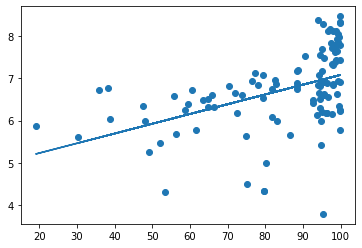

In [28]:
stats(litrate,hf_score)

SCC:  [[1.         0.43723713]
 [0.43723713 1.        ]] 
 
 x_bar:  84.25700934579439 
 
 y_bar:  6.701495327102804


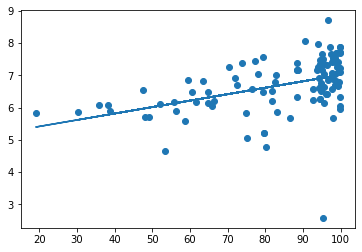

In [29]:
stats(litrate,ef_score)

SCC:  [[1.         0.39233642]
 [0.39233642 1.        ]] 
 
 x_bar:  84.25700934579439 
 
 y_bar:  6.726168224299066


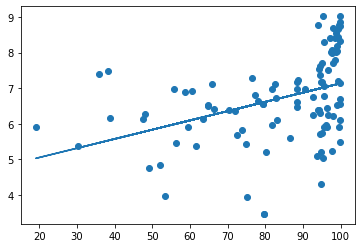

In [30]:
stats(litrate,pf_score)

SCC:  [[1.         0.09168223]
 [0.09168223 1.        ]] 
 
 x_bar:  3.4238037383177575 
 
 y_bar:  6.71392523364486


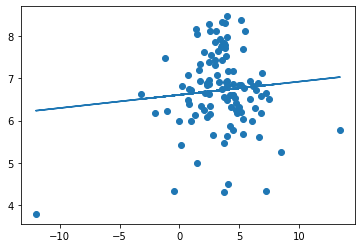

In [31]:
stats(growthrate,hf_score)

SCC:  [[1.         0.21495817]
 [0.21495817 1.        ]] 
 
 x_bar:  3.4238037383177575 
 
 y_bar:  6.701495327102804


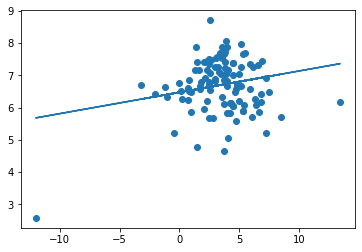

In [32]:
stats(growthrate,ef_score)

SCC:  [[ 1.         -0.00873881]
 [-0.00873881  1.        ]] 
 
 x_bar:  3.4238037383177575 
 
 y_bar:  6.726168224299066


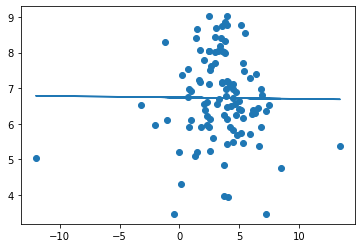

In [33]:
stats(growthrate,pf_score)

SCC:  [[ 1.         -0.13904225]
 [-0.13904225  1.        ]] 
 
 x_bar:  11.797196261682243 
 
 y_bar:  6.71392523364486


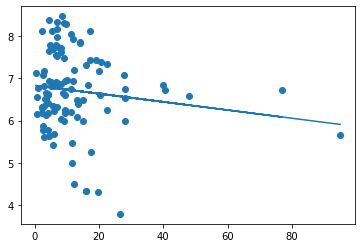

In [34]:
stats(unemployment,hf_score)

SCC:  [[ 1.         -0.26756356]
 [-0.26756356  1.        ]] 
 
 x_bar:  11.797196261682243 
 
 y_bar:  6.701495327102804


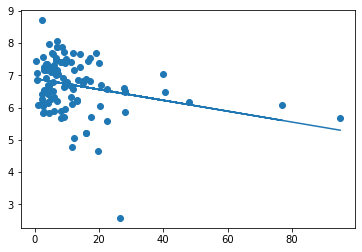

In [35]:
stats(unemployment,ef_score)

SCC:  [[ 1.         -0.02733879]
 [-0.02733879  1.        ]] 
 
 x_bar:  11.797196261682243 
 
 y_bar:  6.726168224299066


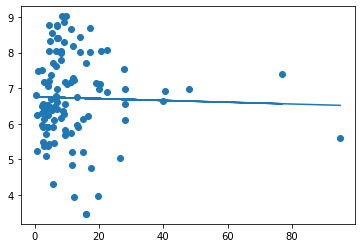

In [36]:
stats(unemployment,pf_score)

SCC:  [[1.         0.60789199]
 [0.60789199 1.        ]] 
 
 x_bar:  6.701495327102804 
 
 y_bar:  6.726168224299066


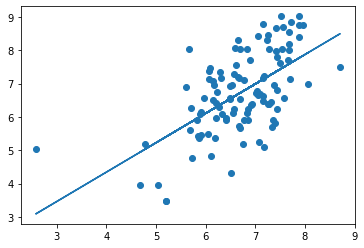

In [37]:
stats(ef_score,pf_score)

In [38]:
df_merged['literacyratepercentall'] = df_merged['literacyratepercentall'].astype('float')

In [39]:
corr = df_merged.drop(columns=['year']).corr()
corr

,hfscore,pfscore,efscore,literacyratepercentall,growthrate,unemploymentpercentage
hfscore,1.000000,0.932992,0.852911,0.456344,0.091682,-0.139042
pfscore,0.932992,1.000000,0.607892,0.392336,-0.008739,-0.027339
efscore,0.852911,0.607892,1.000000,0.437237,0.214958,-0.267564
literacyratepercentall,0.456344,0.392336,0.437237,1.000000,-0.368056,-0.192926
growthrate,0.091682,-0.008739,0.214958,-0.368056,1.000000,-0.072973
unemploymentpercentage,-0.139042,-0.027339,-0.267564,-0.192926,-0.072973,1.000000


Below was adapted from:
https://www.kdnuggets.com/2019/07/annotated-heatmaps-correlation-matrix.html

In [40]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

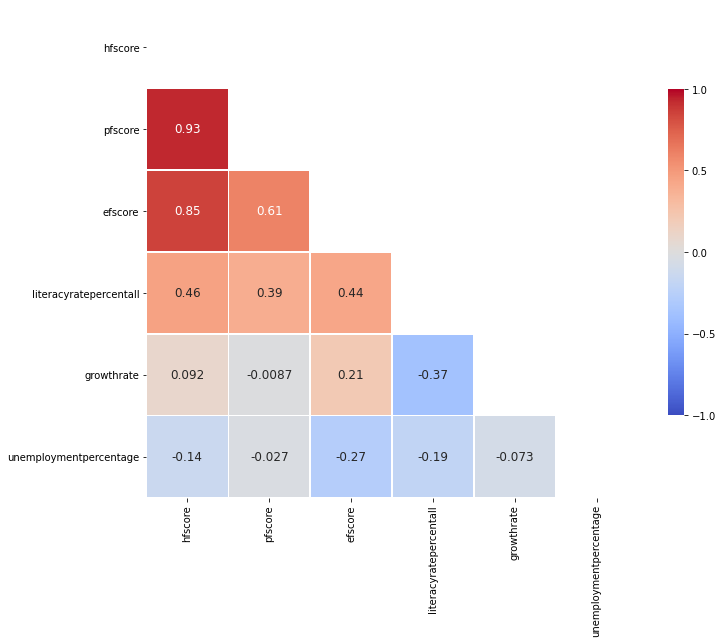

In [41]:
f, ax = plt.subplots(figsize=(11, 15))

heatmap = sns.heatmap(corr,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns)

sns.set_style({'xtick.bottom': True}, {'ytick.left': True})